<a href="https://colab.research.google.com/github/chandan9t8/UnivProjects/blob/main/Matrix%20Factorization/DM_ALS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def matrix_factorisation_als(data, lambda_reg, k, epochs):
    num_users, num_items = data.shape

    U = 0.001 * np.random.rand(num_users, k)  # Adjust initialization
    V = 0.001 * np.random.rand(num_items, k)

    data = np.nan_to_num(data, nan=0)

    errors = []

    for epoch in range(epochs):
        for i in range(num_users):
            U[i, :] = np.linalg.solve(np.dot(V.T, V) + lambda_reg * np.eye(k), np.dot(V.T, data[i, :]))

        for j in range(num_items):
            V[j, :] = np.linalg.solve(np.dot(U.T, U) + lambda_reg * np.eye(k), np.dot(U.T, data[:, j]))

        # Calculate error
        error = np.sum((data - np.dot(U, V.T))**2) + lambda_reg * (np.sum(U**2) + np.sum(V**2))
        errors.append(error)

        if epoch % 50 == 0:
            print(f"Step {epoch}/{epochs}, Error: {error}")

    # Plot convergence
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.title('Convergence of Cost Function')
    plt.show()

    return U, V, errors


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/Data/ratings.csv'
ratings_data = pd.read_csv(dataset_path)

In [ ]:
user_item_matrix = pd.pivot_table(ratings_data, values='recommendation-score', index='user-id', columns='movie-id')
print(user_item_matrix)

movie-id  0     1     2     3     4     5     6     7     8     9     ...  \
user-id                                                               ...   
0          3.5   NaN   NaN   NaN   NaN   2.5   2.0   NaN   NaN   3.0  ...   
1          4.0   4.0   3.0   NaN   3.0   1.0   3.0   NaN   3.0   3.0  ...   
2          NaN   3.0   3.0   NaN   3.0   NaN   NaN   NaN   4.0   NaN  ...   
3          2.0   2.0   NaN   NaN   4.5   4.0   NaN   NaN   3.0   2.5  ...   
4          5.0   2.5   NaN   NaN   NaN   4.5   NaN   NaN   3.0   NaN  ...   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
301        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
302        4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
303        5.0   3.5   NaN   NaN   5.0   NaN   NaN   NaN   NaN   NaN  ...   
304        3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
305        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

In [ ]:
k = 30
epochs = 1000
regularization_rate = 0.01

Step 0/1000, Error: 570458.2899933811
Step 50/1000, Error: 426065.6313191128
Step 100/1000, Error: 425334.693421012
Step 150/1000, Error: 425071.24708007893
Step 200/1000, Error: 424933.23707511905
Step 250/1000, Error: 424848.438372845
Step 300/1000, Error: 424790.0672403751
Step 350/1000, Error: 424746.7757642877
Step 400/1000, Error: 424713.0547011482
Step 450/1000, Error: 424685.87334912794
Step 500/1000, Error: 424663.4001999225
Step 550/1000, Error: 424644.4506469445
Step 600/1000, Error: 424628.21885814023
Step 650/1000, Error: 424614.13480274944
Step 700/1000, Error: 424601.78234932944
Step 750/1000, Error: 424590.84968489135
Step 800/1000, Error: 424581.0979543125
Step 850/1000, Error: 424572.34069661645
Step 900/1000, Error: 424564.42994460126
Step 950/1000, Error: 424557.2465794192


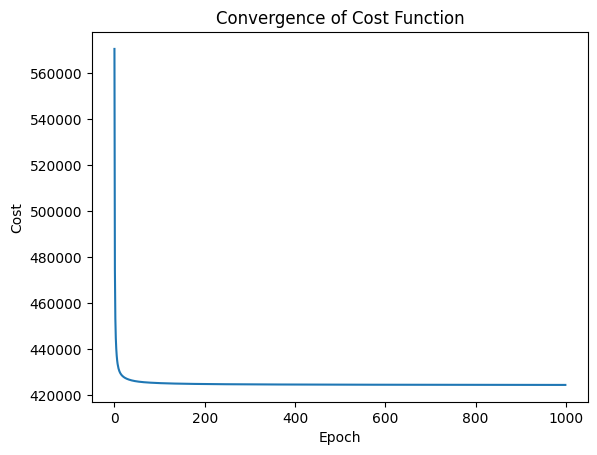

In [ ]:
U,V,cost_matrix = matrix_factorisation_als(user_item_matrix.fillna(0),regularization_rate, k, epochs)

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Data/test.csv')

In [ ]:
predicted_scores = []

for _, row in test_data.iterrows():

    user_id = int(row['user-id'])

    movie_id = int(row['movie-id'])


    score = round(np.dot(U[user_id], V[movie_id].T) * 2) / 2
    predicted_scores.append(score)

In [ ]:
%%capture a
for i in predicted_scores:
    print(i)

# Now 'a' contains the captured output
# You can write it to a file or access it as needed
with open('/content/drive/MyDrive/Data/alspredictions.txt', 'w') as f:
    f.write(a.stdout)